11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.3689 - val_loss: 0.2170
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.2069 - val_loss: 0.1806
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1761 - val_loss: 0.1614
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1591 - val_loss: 0.1497
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1491 - val_loss: 0.1427
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.1425 - val_loss: 0.1377
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1376 - val_loss: 0.1341
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1342 - val_loss: 0.1314
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.1318 - val_loss: 0.1298
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1302 - val_loss: 0.1285
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1291 - val_los

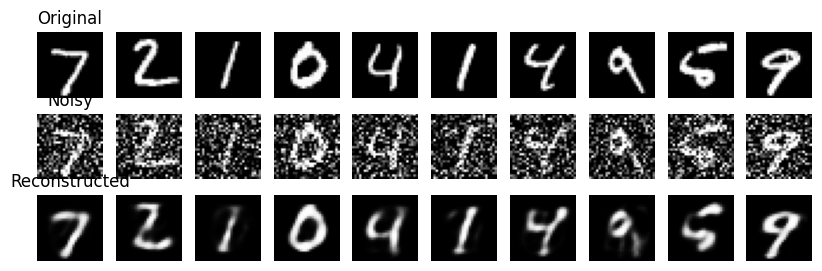

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize and flatten the images
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Add Gaussian noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip pixel values to be in the valid range [0,1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Define the autoencoder
latent_dim = 32  # Can experiment with different values

# Encoder
input_img = Input(shape=(784,))
encoded = Dense(latent_dim, activation='relu')(input_img)

# Decoder
decoded = Dense(784, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train_noisy, x_train,  # Train to reconstruct clean images
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Get reconstructed images
reconstructed_imgs = autoencoder.predict(x_test_noisy[:10])

# Plot original, noisy, and reconstructed images
fig, axes = plt.subplots(3, 10, figsize=(10, 3))
for i in range(10):
    # Original
    axes[0, i].imshow(x_test[i].reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')

    # Noisy
    axes[1, i].imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    axes[1, i].axis('off')

    # Reconstructed
    axes[2, i].imshow(reconstructed_imgs[i].reshape(28, 28), cmap='gray')
    axes[2, i].axis('off')

axes[0, 0].set_title("Original")
axes[1, 0].set_title("Noisy")
axes[2, 0].set_title("Reconstructed")
plt.show()
